In [2]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [3]:
%ls | grep xlsx


In [10]:
sel_columns = ['File', 'Number',
       'Seasonal_strength(168)', 'trend', 'spike', 'linearity',
       'curvature', 'e_acf1', 'e_acf10', 'stability', 'max_level_shift',
       'time_level_shift', 'max_var_shift', 'time_var_shift', 'max_kl_shift',
       'time_kl_shift', 'unitroot_kpss', 'x_pacf5', 'diff1x_pacf5',
       'diff2x_pacf5', 'entropy', 'ARCH.LM', 'x_acf1', 'x_acf10', 'diff1_acf1',
       'diff1_acf10', 'diff2_acf1', 'diff2_acf10', 'arch_acf', 'garch_acf',
       'arch_r2', 'garch_r2', 'hurst', 'lumpiness']

num_columns = ['Seasonal_strength(168)', 'trend', 'spike', 'linearity',
               'curvature', 'e_acf1', 'e_acf10', 'stability', 'max_level_shift',
               'time_level_shift', 'max_var_shift', 'time_var_shift', 'max_kl_shift',
               'time_kl_shift', 'unitroot_kpss', 'x_pacf5', 'diff1x_pacf5',
               'diff2x_pacf5', 'entropy', 'ARCH.LM', 'x_acf1', 'x_acf10', 'diff1_acf1',
               'diff1_acf10', 'diff2_acf1', 'diff2_acf10', 'arch_acf', 'garch_acf',
               'arch_r2', 'garch_r2', 'hurst', 'lumpiness']


df = pd.read_excel('../Features_integrated_20190505.xlsx', usecols=sel_columns)
df = df.loc[df['File'].isin(['v1', 'v2', 'v4', 'v8', 'v11', 'v14', 
                             'v15', 'v19'])].reset_index(drop=True)
print (df.shape)

(199, 34)


In [7]:
df.head(4)

,File,Number,Seasonal_strength(168),trend,spike,linearity,curvature,e_acf1,e_acf10,stability,max_level_shift,time_level_shift,max_var_shift,time_var_shift,max_kl_shift,time_kl_shift,unitroot_kpss,x_pacf5,diff1x_pacf5,diff2x_pacf5,entropy,ARCH.LM,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,arch_acf,garch_acf,arch_r2,garch_r2,hurst,lumpiness
0,v1,1,0.152671,0.808204,1.349517e-09,-58.946017,-21.680192,0.981890,5.508451,0.973097,1.363113,6891,0.376575,7137,14.452703,7140,37.845349,1.341424,0.366391,0.125174,0.391406,0.981872,0.996464,8.961320,0.578496,0.826332,-0.313334,0.103031,0.109227,0.000420,0.113237,0.000413,0.999954,0.001588
1,v1,2,0.021470,0.066756,5.316412e-09,-1.395696,-8.621756,0.944338,4.798932,0.816902,2.394173,8432,1.521405,8632,71.041437,1584,0.342302,0.930350,0.027979,0.368753,0.764218,0.685086,0.948124,5.066257,0.144764,0.034690,-0.395692,0.168454,0.085814,0.001995,0.069790,0.002006,0.999954,0.070405
2,v1,3,0.007537,0.777500,1.484679e-09,-57.069871,-32.101343,0.992435,7.976308,0.988837,1.441543,6891,0.439625,7128,18.553486,7141,34.621568,1.223022,0.245003,0.231018,0.415336,0.989785,0.998283,9.512023,0.468663,0.468670,-0.375916,0.145669,0.178780,0.000490,0.200209,0.000485,0.999954,0.000783
3,v1,4,0.157970,0.185481,1.129809e-08,-18.186589,-28.969167,0.976228,4.651800,0.840680,2.848308,789,2.151772,7336,111.147620,616,5.401221,1.335032,0.359125,0.109731,0.691048,0.948439,0.980758,5.375227,0.586028,0.735381,-0.276871,0.083172,0.116142,0.001948,0.106073,0.001930,0.999954,0.046270


#### For the begining, let's start just with V1, V2 and V4

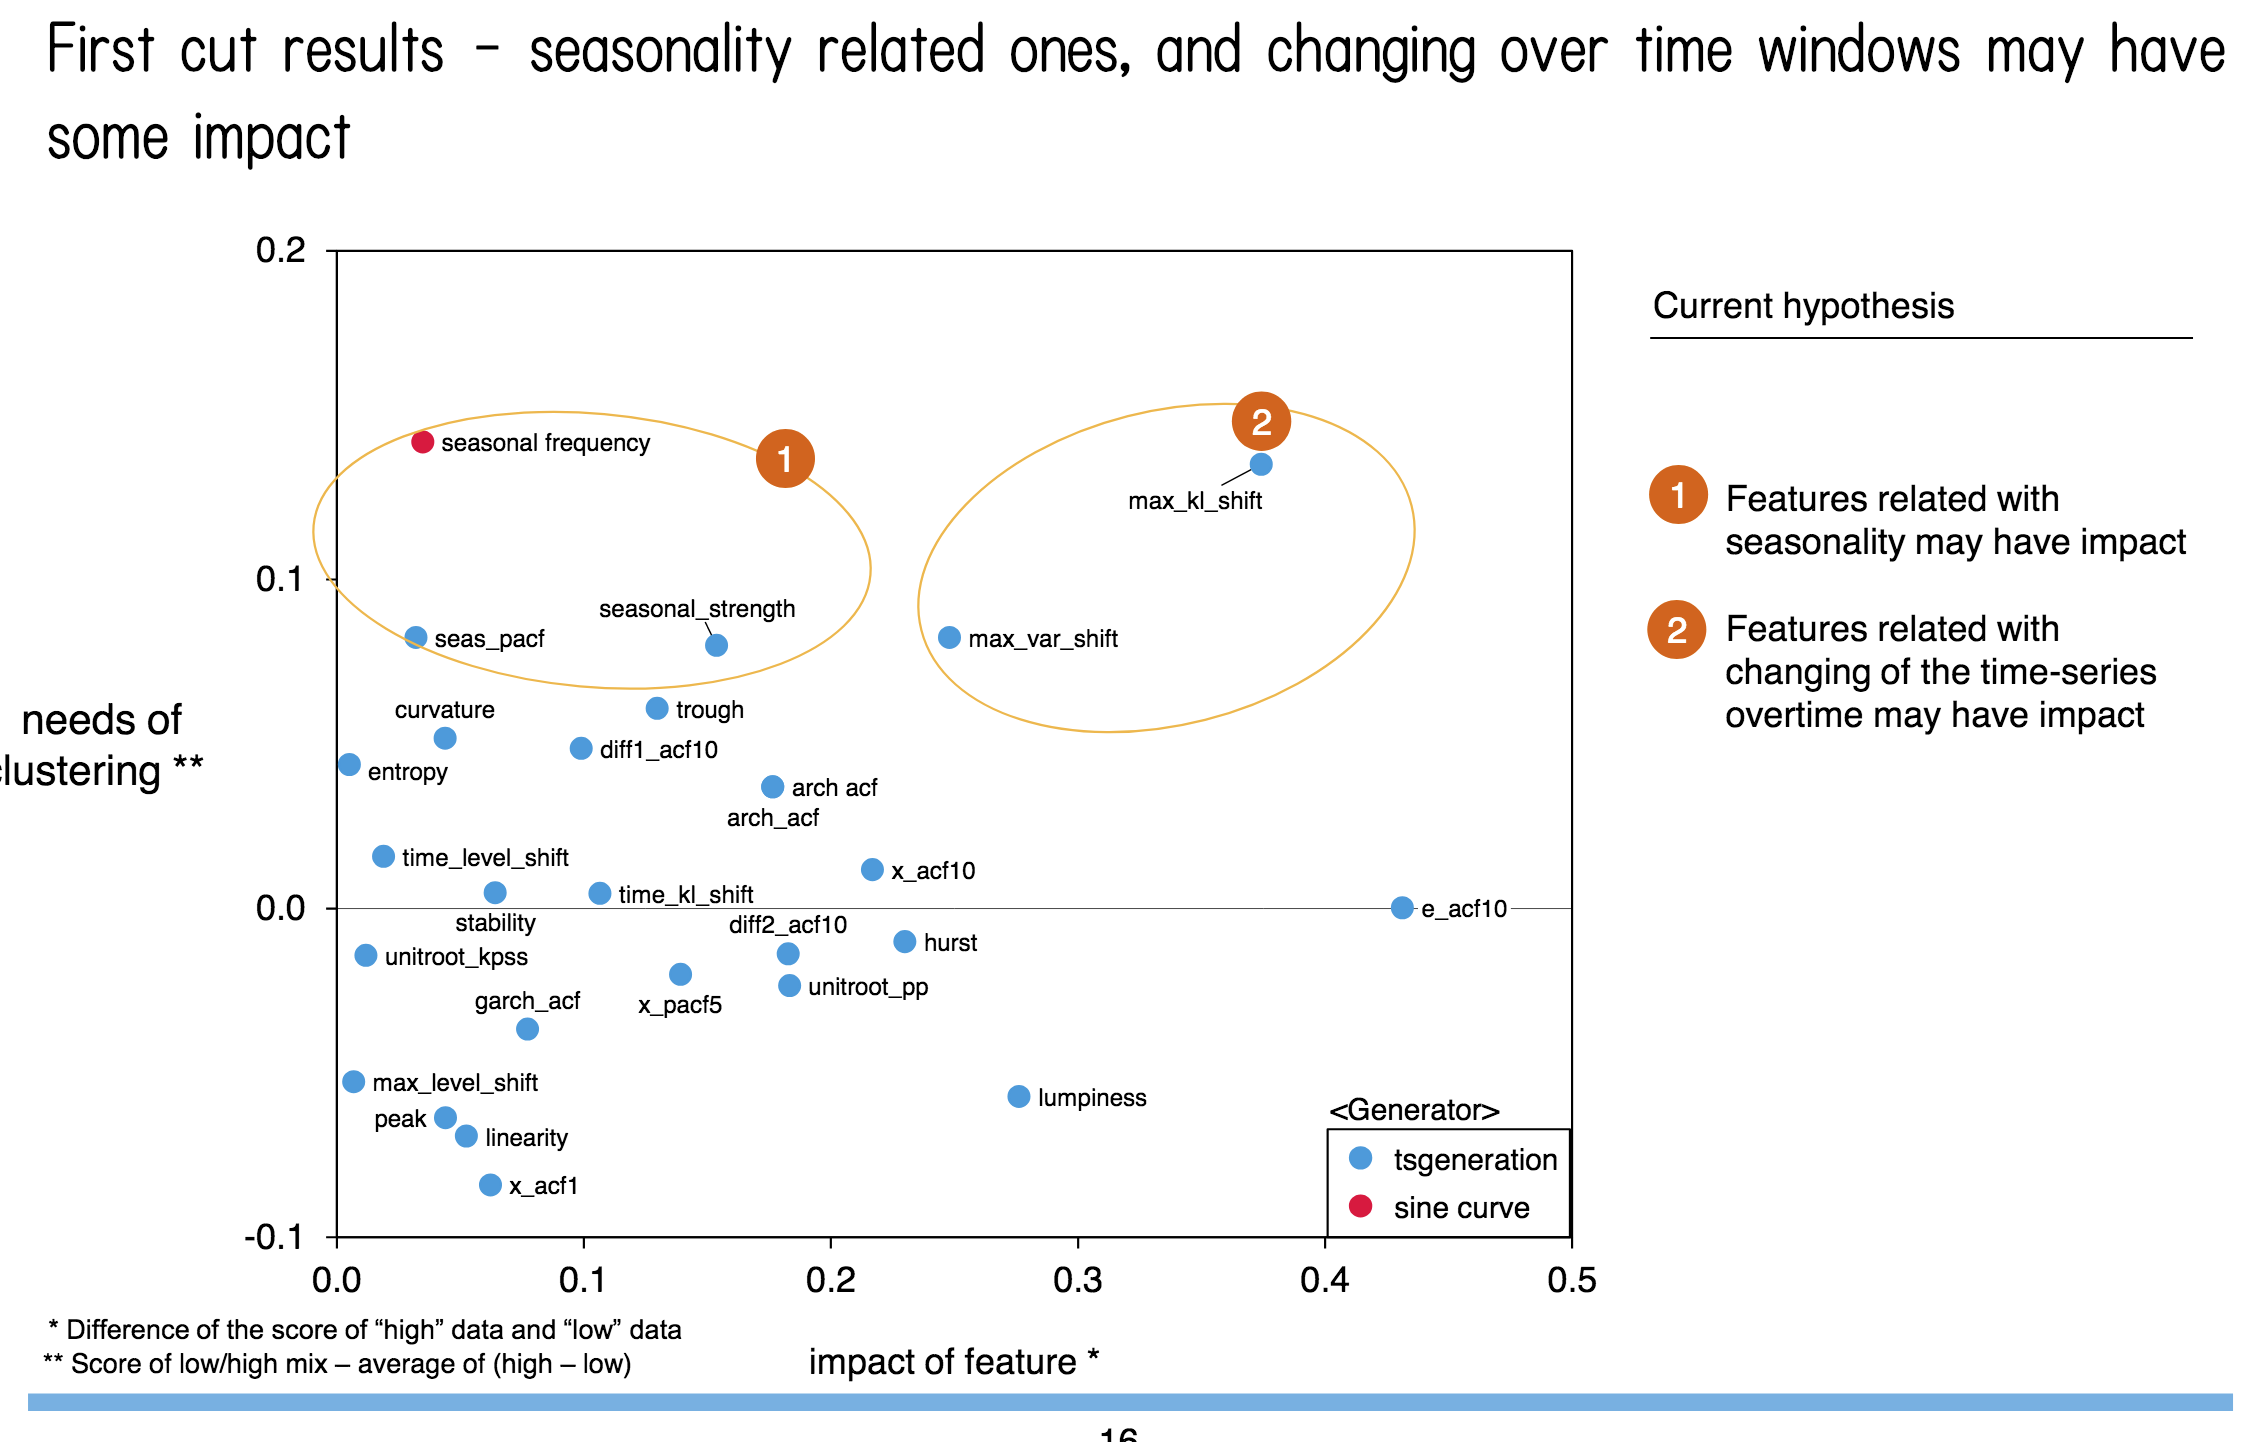

In [31]:
Image("tomie_cluster.png", width=600, height=600)

In [12]:
df_zscore = df
df_zscore[num_columns] = (df[num_columns] - df[num_columns].mean())/df[num_columns].std()

In [13]:
df_zscore.shape

(199, 34)

In [30]:
from sklearn.cluster import KMeans

v = df_zscore[num_columns].values
y_pred_kmeans = KMeans(n_clusters=2,  max_iter=1e5).fit_predict(v)

In [31]:
df['cluster'] = y_pred_kmeans

In [32]:
df['cluster'].sum()

68

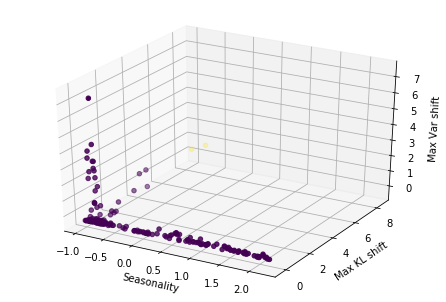

In [99]:
from sklearn.cluster import SpectralClustering

v = df_zscore[num_features].values
y_pred = SpectralClustering(n_clusters=2,
                            assign_labels="kmeans",
                            n_neighbors=5,
                            n_init=50).fit_predict(v)

fig = plt.figure()
ax = Axes3D(fig);

v = df_zscore[num_features].values
ax.scatter(v[:,0], v[:,1], v[:,2],  c=y_pred);

ax.set_xlabel('Seasonality')
ax.set_ylabel('Max KL shift')
ax.set_zlabel('Max Var shift');

In [33]:
df['file_number'] = df['File'] + ' Meas_' + df['Number'].map(str)

In [34]:
df['column'] = ' Meas_' + df['Number'].map(str)

In [35]:
del df['Number']

In [36]:
%pwd

'/Users/MD/time_series_clustering/clustering'

In [37]:
df.to_pickle('../k_means_all_features_v.pkl')

In [39]:
df

,File,Seasonal_strength(168),trend,spike,linearity,curvature,e_acf1,e_acf10,stability,max_level_shift,time_level_shift,max_var_shift,time_var_shift,max_kl_shift,time_kl_shift,unitroot_kpss,x_pacf5,diff1x_pacf5,diff2x_pacf5,entropy,ARCH.LM,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,arch_acf,garch_acf,arch_r2,garch_r2,hurst,lumpiness,cluster,file_number,column
0,v1,-0.034996,2.152672,-0.207425,-2.348592,-1.320257,0.848876,1.032255,1.375308,-0.916147,1.863756,-0.377531,1.912950,-0.241977,2.157236,2.680011,1.202899,0.808148,-1.202298,-2.012693,1.205077,0.817547,1.785170,1.243974,0.903117,0.343878,-1.259901,-0.526070,-0.526469,-0.141041,-0.556153,0.231283,-0.238251,1,v1 Meas_1,Meas_1
1,v1,-0.864044,-0.724883,-0.207144,-0.066154,-0.536936,0.632529,0.724889,0.671778,-0.576332,2.597725,-0.359328,2.636755,-0.225354,-0.615574,-0.774486,0.004664,-0.909968,-0.219459,0.456234,0.078979,0.539187,0.400318,-0.003944,-0.628568,-0.076000,-0.707283,-0.716110,-0.290489,-0.644772,-0.302642,0.231283,-0.236677,0,v1 Meas_2,Meas_2
2,v1,-0.952082,2.033510,-0.207416,-2.274184,-1.945378,0.909627,2.101337,1.446203,-0.890299,1.863756,-0.376529,1.908593,-0.240772,2.157735,2.383060,0.857770,0.191863,-0.775221,-1.854222,1.235101,0.828023,1.980968,0.927967,0.211104,0.024823,-0.899749,0.038463,-0.516083,0.867322,-0.544763,0.231283,-0.238269,1,v1 Meas_3,Meas_3
3,v1,-0.001513,-0.264113,-0.206721,-0.732079,-1.757492,0.816255,0.661151,0.778877,-0.426659,-1.042588,-0.349304,2.009296,-0.213573,-1.098670,-0.308497,1.184266,0.771259,-1.264612,-0.028328,1.078221,0.727105,0.510169,1.265645,0.727142,0.529777,-1.427644,-0.469948,-0.297499,-0.224102,-0.314737,0.231283,-0.237229,1,v1 Meas_4,Meas_4
4,v1,1.680420,0.509375,-0.204287,-0.409678,-1.472836,-0.044636,-0.866618,-0.407701,-0.226576,0.442496,-0.263146,0.350596,-0.174704,0.547249,-0.186734,1.023972,1.444154,-0.437057,-0.677201,0.111524,0.224045,-0.598914,0.908740,0.326198,2.337727,1.707791,-0.240506,-0.089794,-0.050463,-0.090922,0.230719,-0.216862,1,v1 Meas_5,Meas_5
5,v1,1.485913,0.841163,-0.204576,-0.835566,-1.614548,-0.034331,-0.876447,-0.109039,-0.271723,0.442496,-0.269938,0.350596,-0.167953,0.547249,0.225504,1.070552,1.390200,-0.433880,-0.833721,0.152475,0.314840,-0.339324,0.888645,0.290868,2.298726,1.571782,-0.126656,-0.556640,0.105879,-0.587074,0.230719,-0.219067,1,v1 Meas_6,Meas_6
6,v1,1.055343,0.395109,-0.206491,1.833030,-0.526284,0.028073,-0.763999,-0.501790,-0.566601,0.442496,-0.334396,0.334135,-0.229751,1.176571,2.615795,0.803068,0.998535,-0.724935,-0.642689,-0.417415,0.241936,-0.690671,0.909359,0.260033,2.061333,1.016547,0.006262,0.209288,0.075166,0.240843,0.230719,-0.231070,1,v1 Meas_7,Meas_7
7,v1,1.762739,-0.123836,-0.205061,0.389009,-0.954106,-0.046829,-0.826181,-0.969353,-0.285696,0.442496,-0.284421,0.334135,-0.217610,0.547249,-0.289550,0.746528,1.152529,-0.600686,-0.427298,-0.116231,0.059685,-0.911513,0.888871,0.327444,2.169070,1.577593,-0.452409,-0.119790,-0.282919,-0.128652,0.230719,-0.222753,0,v1 Meas_8,Meas_8
8,v1,0.865785,0.153993,-0.200850,1.753216,-0.144797,-0.249250,-0.886939,-0.747811,-0.281935,1.108831,-0.045786,-1.110087,-0.211237,-0.955438,2.593970,-0.071448,-0.149775,-0.616405,-0.158432,-1.404837,-0.011254,-0.831754,0.401310,-0.135456,1.027864,-0.222488,-0.837245,-0.581553,-0.686258,-0.613337,0.229979,-0.213038,0,v1 Meas_9,Meas_9
9,v1,1.485897,0.841160,-0.204576,-0.835558,-1.614543,-0.034331,-0.876447,-0.109042,-0.271722,0.442496,-0.269938,0.350596,-0.167953,0.547249,0.225492,1.070563,1.390211,-0.433874,-0.833720,0.152474,0.314839,-0.339327,0.888645,0.290868,2.298731,1.571786,-0.126653,-0.556670,0.105880,-0.587106,0.230719,-0.219067,1,v1 Meas_10,Meas_10
